In [1]:
!pip install dataprep

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 6.0 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.5/28.5 MB 11.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 7.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 966.9/966.9 kB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for metaphone: filename=Metaphone-0.6-py3-none-any.whl size=13918 sha256=e985c3393a4e18fc

In [2]:
import random
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
df = pd.read_csv('/kaggle/input/cars-germany/autoscout24-germany-dataset.csv')
  
display(df)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


## Preprocessing
* Remove duplicated lines
* Remove any rows with missing values
* Transform some of the feautres mathematically

In [4]:
cleandf = df.drop_duplicates(ignore_index=True)

cleandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44265 entries, 0 to 44264
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    44265 non-null  int64  
 1   make       44265 non-null  object 
 2   model      44128 non-null  object 
 3   fuel       44265 non-null  object 
 4   gear       44090 non-null  object 
 5   offerType  44265 non-null  object 
 6   price      44265 non-null  int64  
 7   hp         44241 non-null  float64
 8   year       44265 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.0+ MB


In [5]:
prestindf = cleandf.dropna(axis='index')

prestindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43947 entries, 0 to 44264
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    43947 non-null  int64  
 1   make       43947 non-null  object 
 2   model      43947 non-null  object 
 3   fuel       43947 non-null  object 
 4   gear       43947 non-null  object 
 5   offerType  43947 non-null  object 
 6   price      43947 non-null  int64  
 7   hp         43947 non-null  float64
 8   year       43947 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.4+ MB


In [6]:
prestindf['mileagelnp'] = np.log1p(prestindf['mileage'])
prestindf['pricelnp'] = np.log1p(prestindf['price'])
prestindf['hpln'] = np.log1p(prestindf['hp'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

## Modelling

The plan is to create two version of the training set. One with scaled feastures and the other with features as they are. We will explore with cross validation which feautres works best and what model parameters are giving best performance in our current dataset.

In [7]:
datasetone = prestindf[["mileage", "make", "model", "fuel", "gear", "offerType", "year", "hp", "price"]]
datasettwo = prestindf[["mileagelnp", "make", "model", "fuel", "gear", "offerType", "year", "hpln", "pricelnp"]]

### Modelling for datset1

In [8]:
# Casting object columns into categorical
obj_feat = list(datasetone.loc[:, datasetone.dtypes == 'object'].columns.values)
obj_feat

['make', 'model', 'fuel', 'gear', 'offerType']

In [9]:
for feature in obj_feat:
    datasetone[feature] = pd.Series(datasetone[feature], dtype="category")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
datasetone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43947 entries, 0 to 44264
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   mileage    43947 non-null  int64   
 1   make       43947 non-null  category
 2   model      43947 non-null  category
 3   fuel       43947 non-null  category
 4   gear       43947 non-null  category
 5   offerType  43947 non-null  category
 6   year       43947 non-null  int64   
 7   hp         43947 non-null  float64 
 8   price      43947 non-null  int64   
dtypes: category(5), float64(1), int64(3)
memory usage: 2.0 MB


In [11]:
# get the labels
dff = datasetone.copy()
y = dff.price

#
# Create the LightGBM data containers
#
x_train, x_test, y_train, y_test = train_test_split(dff.drop(['price'], inplace=False, axis=1), y, test_size=0.20)
train_data = lgb.Dataset(x_train, y_train)
test_data = lgb.Dataset(x_test, y_test)

In [12]:
from time import process_time

MAX_EVALS = 35 # because this is time consuming and this run is not in GPU so we keept it manageable

param_grid = {
    'boosting_type': ['gbdt'],
    'num_leaves': list(range(20, 300)),
    'max_depth' : list(range(5,200)),
    'learning_rate': [0.01,0.05,0.1],
    'min_child_samples': [5],
    'reg_alpha': list(np.linspace(0, 1)),
    'reg_lambda': list(np.linspace(0, 1)),
    'colsample_bytree': list(np.linspace(0.8, 1, 10)),
    'subsample': list(np.linspace(0.8, 1, 10)),
    'eval_metric': ['rmse'],
    'objective': ['regression'],
    'silent': [True],
    'nthread': [-1]
}

In [13]:
#Objective function for random search. Returns
#the cross validation score from a set of hyperparameters.
def objective(hyperparameters, iteration):
     # Perform n_folds cross validation
    t1_start = process_time()
    cv_results = lgb.cv(hyperparameters, train_data,
                        nfold = 5,
                        early_stopping_rounds = 500,
                        metrics = 'rmse',
                        seed = 42,
                        verbose_eval = False,
                        stratified = False)

    t1_stop = process_time()
    print(f"Elapsed time during the model training in seconds: {t1_stop-t1_start}")
    # results to return
    score = cv_results['rmse-mean'][-1]
    estimators = len(cv_results['rmse-mean'])
    hyperparameters['n_estimators'] = estimators

    return [score, hyperparameters, iteration]


# Defining function for random search for hyperparameter tuning
def random_search(param_grid, max_evals = MAX_EVALS):
    results = pd.DataFrame(columns = ['score', 'params', 'iteration'],
                                  index = list(range(MAX_EVALS)))
    for i in range(MAX_EVALS):
        print("Iteration Number: %s out of %s iterations " %(i,MAX_EVALS))
        # Choose random hyperparameters
        random_params = {k: random.sample(v, 1)[0] for k, v in param_grid.items()}
        # Evaluate randomly selected hyperparameters
        eval_results = objective(random_params, i)
        results.loc[i, :] = eval_results
        print("merror:%s" % eval_results[0])
    # Sort with best score on top
    results.sort_values('score', ascending = True, inplace = True)
    results.reset_index(inplace = True)
    return results

In [14]:
t1_start = process_time()
random_results = random_search(param_grid)
random_search_params = random_results.loc[0, 'params']
t1_stop = process_time()
print(f"Elapsed time during the model training in seconds: {t1_stop-t1_start}")


print('The best rmse was {:.5f}'.format(random_results.loc[0, 'score']))
print('\nThe best hyperparameters were:%s' % random_results.loc[0, 'params'])

Iteration Number: 0 out of 35 iterations 
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1118
[LightGBM] [Info] Number of data points in the train set: 28124, number of used features: 8
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1487: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'


[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1118
[LightGBM] [Info] Number of data points in the train set: 28124, number of used features: 8
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Start training from score 16560.931304
[LightGBM] [Info] Start training from score 16410.216897
[LightGBM] [Info] Start training from score 16535.218532
[LightGBM] [Info] Start training from score 16530.993422
[LightGBM] [Info] Start training from score 16558.783495


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Elapsed time during the model training in seconds: 33.698319788000006
merror:8217.359477586113
Iteration Number: 1 out of 35 iterations 
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001969 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1118
[LightGBM] [Info] Number of data points in the train set: 28124, number of used features: 8
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown p

In [15]:
print('The best rmse was {:.5f}'.format(random_results.loc[0, 'score']))
print('\nThe best hyperparameters were:%s' % random_results.loc[0, 'params'])

The best rmse was 7879.58593

The best hyperparameters were:{'boosting_type': 'gbdt', 'num_leaves': 268, 'max_depth': 15, 'learning_rate': 0.1, 'min_child_samples': 5, 'reg_alpha': 0.673469387755102, 'reg_lambda': 1.0, 'colsample_bytree': 0.9777777777777777, 'subsample': 0.8666666666666667, 'eval_metric': 'rmse', 'objective': 'regression', 'silent': True, 'nthread': -1, 'n_estimators': 35}


In [17]:
set1bestparam = random_results.loc[0, 'params']

### Modelling for dataset two

In [18]:
# Casting object columns into categorical
obj_feat = list(datasettwo.loc[:, datasettwo.dtypes == 'object'].columns.values)
obj_feat

['make', 'model', 'fuel', 'gear', 'offerType']

In [19]:
for feature in obj_feat:
    datasettwo[feature] = pd.Series(datasettwo[feature], dtype="category")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
datasettwo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43947 entries, 0 to 44264
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   mileagelnp  43947 non-null  float64 
 1   make        43947 non-null  category
 2   model       43947 non-null  category
 3   fuel        43947 non-null  category
 4   gear        43947 non-null  category
 5   offerType   43947 non-null  category
 6   year        43947 non-null  int64   
 7   hpln        43947 non-null  float64 
 8   pricelnp    43947 non-null  float64 
dtypes: category(5), float64(3), int64(1)
memory usage: 2.0 MB


In [22]:
# get the labels
dff = datasettwo.copy()
y = dff.pricelnp

#
# Create the LightGBM data containers
#
x_train, x_test, y_train, y_test = train_test_split(dff.drop(['pricelnp'], inplace=False, axis=1), y, test_size=0.20)
train_data = lgb.Dataset(x_train, y_train)
test_data = lgb.Dataset(x_test, y_test)

In [23]:
from time import process_time

MAX_EVALS = 35 # because this is time consuming and this run is not in GPU so we keept it manageable

param_grid = {
    'boosting_type': ['gbdt'],
    'num_leaves': list(range(20, 300)),
    'max_depth' : list(range(5,200)),
    'learning_rate': [0.01,0.05,0.1],
    'min_child_samples': [5],
    'reg_alpha': list(np.linspace(0, 1)),
    'reg_lambda': list(np.linspace(0, 1)),
    'colsample_bytree': list(np.linspace(0.8, 1, 10)),
    'subsample': list(np.linspace(0.8, 1, 10)),
    'eval_metric': ['rmse'],
    'objective': ['regression'],
    'nthread': [-1]
}

In [26]:
#Objective function for random search. Returns
#the cross validation score from a set of hyperparameters.
def objective(hyperparameters, iteration):
     # Perform n_folds cross validation
    t1_start = process_time()
    cv_results = lgb.cv(hyperparameters, train_data,
                        nfold = 5,
                        early_stopping_rounds = 500,
                        metrics = 'rmse',
                        seed = 42,
                        stratified = False)

    t1_stop = process_time()
    print(f"Elapsed time during the model training in seconds: {t1_stop-t1_start}")
    # results to return
    score = cv_results['rmse-mean'][-1]
    estimators = len(cv_results['rmse-mean'])
    hyperparameters['n_estimators'] = estimators

    return [score, hyperparameters, iteration]


# Defining function for random search for hyperparameter tuning
def random_search(param_grid, max_evals = MAX_EVALS):
    results = pd.DataFrame(columns = ['score', 'params', 'iteration'],
                                  index = list(range(MAX_EVALS)))
    for i in range(MAX_EVALS):
        print("Iteration Number: %s out of %s iterations " %(i,MAX_EVALS))
        # Choose random hyperparameters
        random_params = {k: random.sample(v, 1)[0] for k, v in param_grid.items()}
        # Evaluate randomly selected hyperparameters
        eval_results = objective(random_params, i)
        results.loc[i, :] = eval_results
        print("merror:%s" % eval_results[0])
    # Sort with best score on top
    results.sort_values('score', ascending = True, inplace = True)
    results.reset_index(inplace = True)
    return results

In [27]:
t1_start = process_time()
random_results = random_search(param_grid)
random_search_params = random_results.loc[0, 'params']
t1_stop = process_time()
print(f"Elapsed time during the model training in seconds: {t1_stop-t1_start}")

Iteration Number: 0 out of 35 iterations 
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1127
[LightGBM] [Info] Number of data points in the train set: 28124, number of used features: 8
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001949 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1127
[LightGBM] [Info] Number of data points in the train set: 28124, number of used features: 8


In [28]:
print('The best rmse was {:.5f}'.format(random_results.loc[0, 'score']))
print('\nThe best hyperparameters were:%s' % random_results.loc[0, 'params'])

The best rmse was 0.14343

The best hyperparameters were:{'boosting_type': 'gbdt', 'num_leaves': 154, 'max_depth': 18, 'learning_rate': 0.1, 'min_child_samples': 5, 'reg_alpha': 0.7346938775510203, 'reg_lambda': 0.3061224489795918, 'colsample_bytree': 0.8666666666666667, 'subsample': 0.8666666666666667, 'eval_metric': 'rmse', 'objective': 'regression', 'nthread': -1, 'n_estimators': 100}


In [30]:
set2bestparam = random_results.loc[0, 'params']

## performance Analysis

We have two models (hyperparaemters that can give us best model performance) and we cannot compare them apple to apple. The reason we cannot compare is because the RMSE metric even though its the same metric for each experiment,  it was a result of a different datasets. Remember that in dataset2 we have transfromed the values mathematically.

So, how to compare them?

The approach I would take is by prediction taking the predictions of each model and derive a margin of error distribution. Then the comparison can be by looking at the percentage of data points within +-5% error margin. To the best of my knowledge this is an emprical approach to quantify the quality of price prediction.

Due to this being just an assessment use case I will take the first model (model trained in datasetone) and export it to be used in the API.

## Training best model and export it

In [31]:
# get the labels
dff = datasetone.copy()
y = dff.price

#
# Create the LightGBM data containers
#
x_train, x_test, y_train, y_test = train_test_split(dff.drop(['price'], inplace=False, axis=1), y, test_size=0.20)

In [32]:
#Fit Model
model = lgb.LGBMRegressor(**set1bestparam, random_state = 42,verbosity=-1)
model.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1


LGBMRegressor(colsample_bytree=0.9777777777777777, eval_metric='rmse',
              max_depth=15, min_child_samples=5, n_estimators=35, nthread=-1,
              num_leaves=268, objective='regression', random_state=42,
              reg_alpha=0.673469387755102, reg_lambda=1.0, silent=True,
              subsample=0.8666666666666667, verbosity=-1)

In [34]:
import joblib
# save model
joblib.dump(model, 'german_cars_pricing_model.pkl')
# # load model
# gbm_pickle = joblib.load('lgb.pkl')

['german_cars_pricing_model.pkl']

## Feature importance plot

MSE: 47321134.98
RMSE: 6879.04


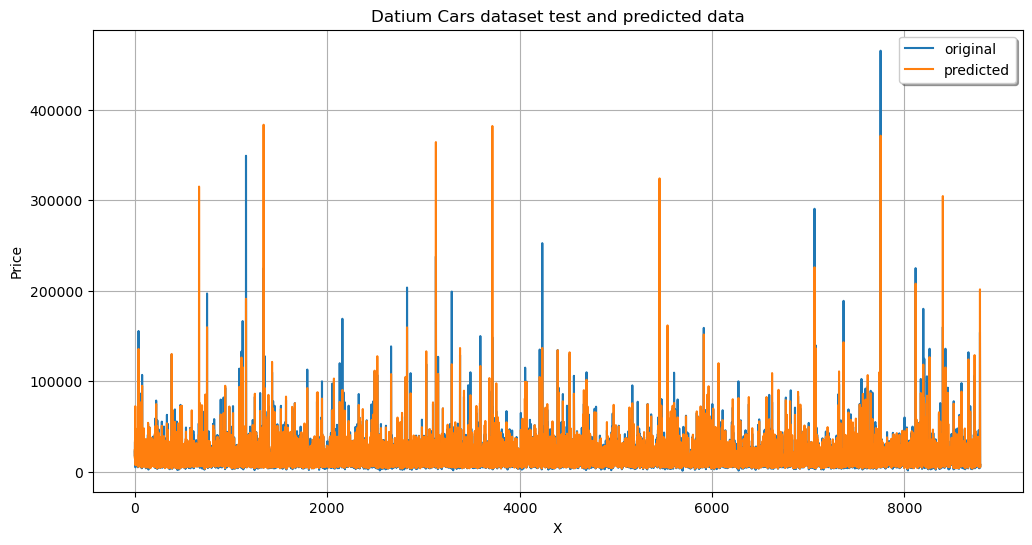

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

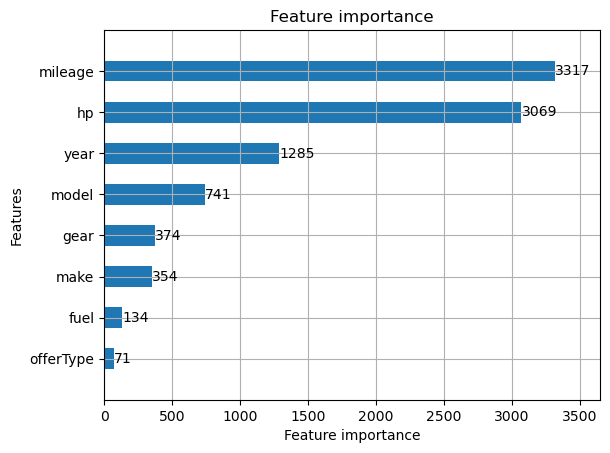

In [33]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# prediction
y_pred = model.predict(x_test)

# accuracy check
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Datium Cars dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

# plotting feature importance
lgb.plot_importance(model, height=.5)